In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
from sklearn import metrics

## Data Understanding        

In [2]:
housePrice = pd.read_csv('train.csv', keep_default_na=False, low_memory=False)

housePrice.shape

(1460, 81)

In [3]:
# iterate over each row in the input file
labels = []
for i in housePrice['SalePrice']:
    if(i <= 150000):
        labels.append('LOW')
    elif(i > 150000 and i < 300000):
        labels.append('MEDIUM')
    else:
        labels.append('HIGH')
        
housePrice['PriceLabel'] = labels
housePrice['PriceLabel'] = housePrice['PriceLabel'].astype('category')

In [4]:
# how many elements are there (the attribute Id and salePrice is useless for data minning)
if all([item in housePrice.columns for item in ['Id']]):
    housePrice.drop(['Id'], axis=1, inplace=True)
if all([item in housePrice.columns for item in ['SalePrice']]):
    housePrice.drop(['SalePrice'], axis=1, inplace=True)
housePrice.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
housePrice.dtypes

MSSubClass          int64
MSZoning           object
LotFrontage        object
LotArea             int64
Street             object
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
PriceLabel       category
Length: 80, dtype: object

In [6]:
housePrice['PriceLabel'].unique()

['MEDIUM', 'LOW', 'HIGH']
Categories (3, object): ['HIGH', 'LOW', 'MEDIUM']

In [7]:
housePrice['PriceLabel']

0       MEDIUM
1       MEDIUM
2       MEDIUM
3          LOW
4       MEDIUM
         ...  
1455    MEDIUM
1456    MEDIUM
1457    MEDIUM
1458       LOW
1459       LOW
Name: PriceLabel, Length: 1460, dtype: category
Categories (3, object): ['HIGH', 'LOW', 'MEDIUM']

In [8]:
housePrice['PriceLabel'].value_counts()

MEDIUM    726
LOW       619
HIGH      115
Name: PriceLabel, dtype: int64

In [9]:
housePrice.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [10]:
housePrice['MSSubClass'].mean()

56.897260273972606

In [11]:
housePrice.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceLabel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
housePrice.isnull().sum()
for i in housePrice.isnull().sum():
    if (i != 0):
        print(i)

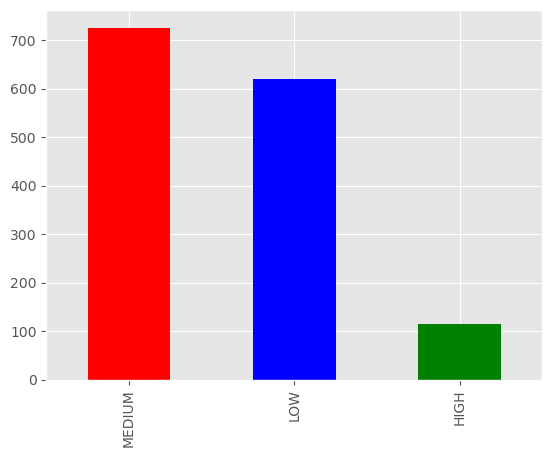

In [13]:
housePrice['PriceLabel'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

Balanced dataset shape: (345, 80)


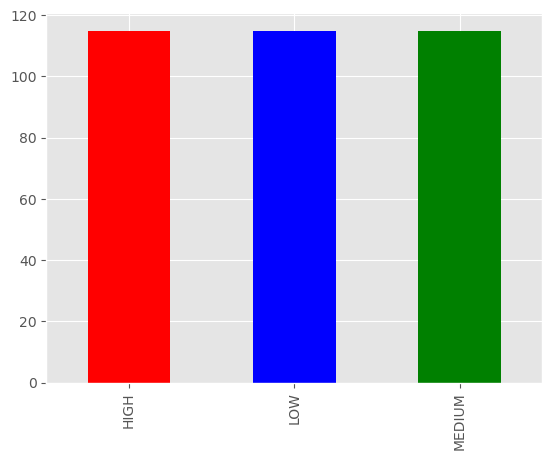

In [14]:
from sklearn.utils import resample
housePrice_low = housePrice[housePrice.PriceLabel=='LOW']
housePrice_medium = housePrice[housePrice.PriceLabel=='MEDIUM']
housePrice_high = housePrice[housePrice.PriceLabel=='HIGH']
housePrice_low_downsampled = resample(housePrice_low,
                                   replace=False,
                                   n_samples=len(housePrice_high),
                                   random_state=42)

housePrice_medium_downsampled = resample(housePrice_medium,
                                   replace=False,
                                   n_samples=len(housePrice_high),
                                   random_state=42)

housePrice_balanced = pd.concat([housePrice_low_downsampled, housePrice_high,housePrice_medium_downsampled])

print(f'Balanced dataset shape: {housePrice_balanced.shape}')
housePrice_balanced['PriceLabel'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

#### Banlance Dataset did not make the result more accuracy.

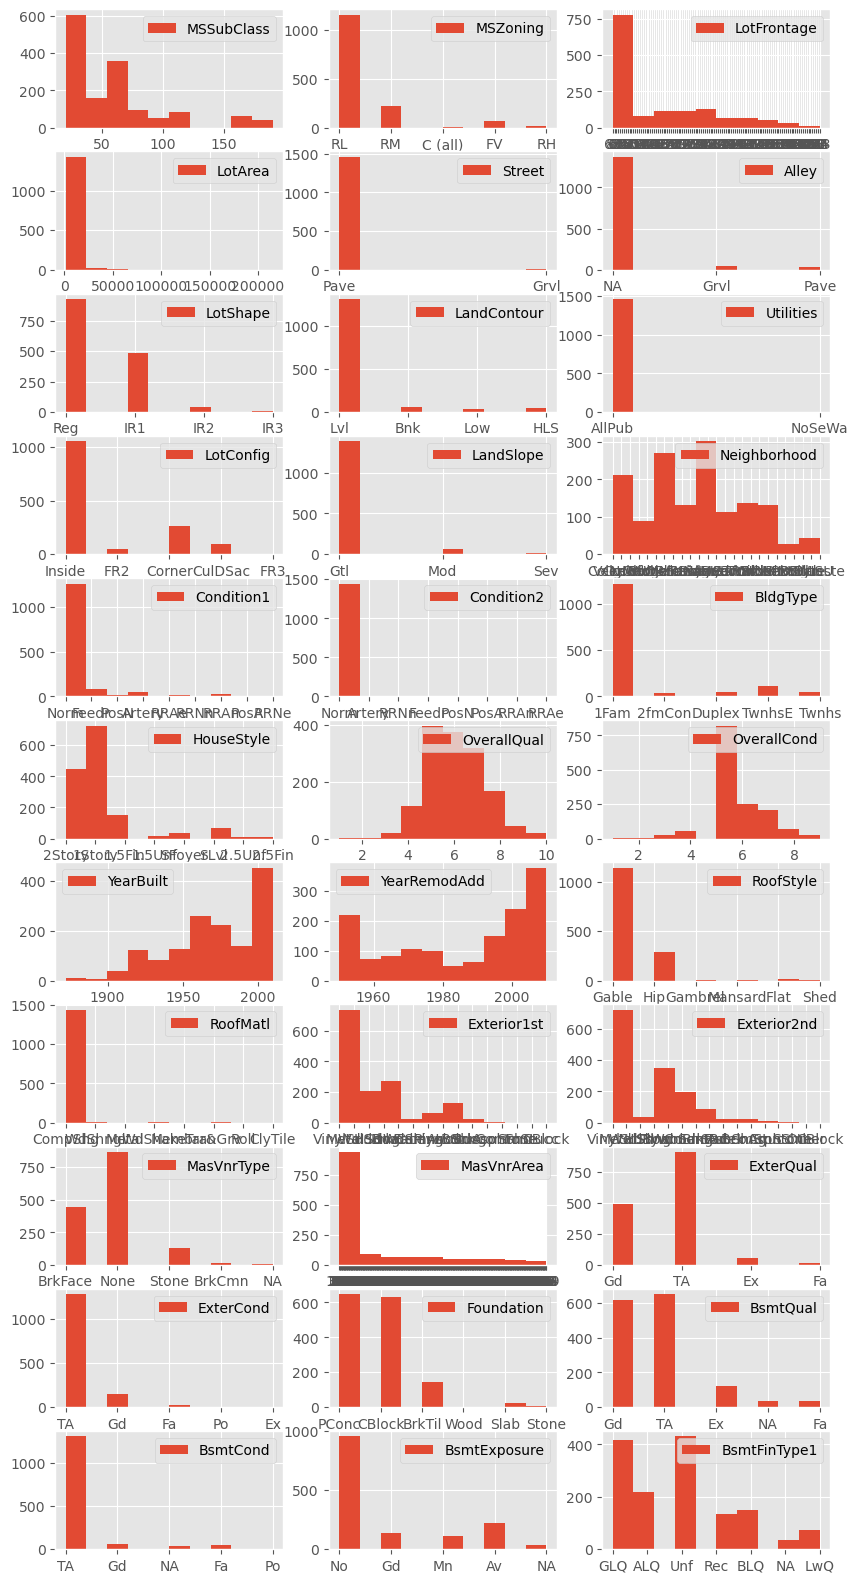

In [15]:
# set the value to object which shows in number(eg. MSSubClass is number but represent as catagory)
housePrice['MSSubClass'] = housePrice['MSSubClass'].astype(object)
    

# plot the Histogram
fig, ax = plt.subplots(11, 3, figsize = (10, 20))
series_list = []
for col in housePrice.columns:
    series_list.append(housePrice[col])
index = 0
for i in range(11):
    for j in range(3):
        series_list[index].hist(ax = ax[i, j], legend=True)
        index += 1
plt.show()

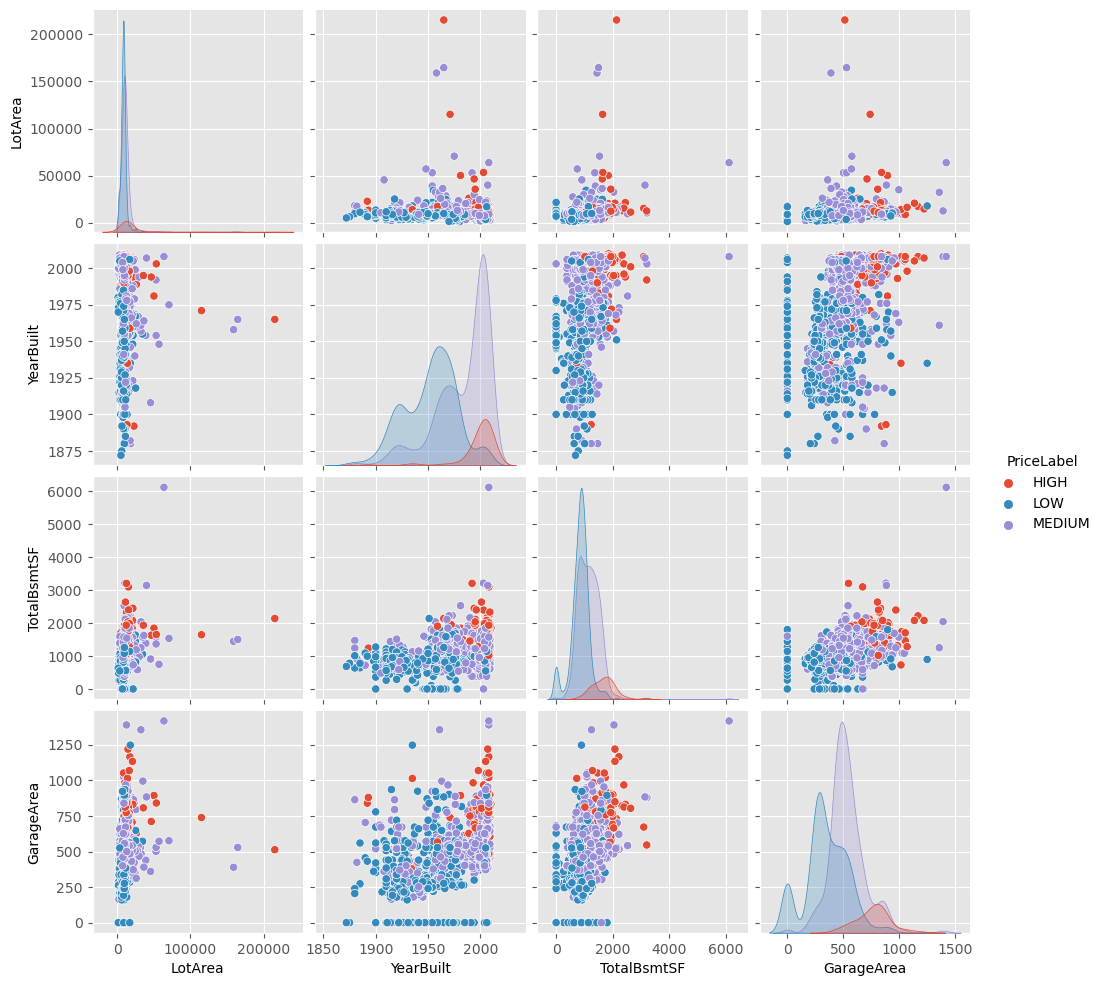

In [16]:
data = housePrice[['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea','Neighborhood','PriceLabel']]
sn.pairplot(data, hue = 'PriceLabel')
plt.show()

C:\Users\Giacomino\AppData\Local\Temp\ipykernel_3416\1936441617.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(housePrice.corr(), annot=True, cmap='magma', fmt='.2f')


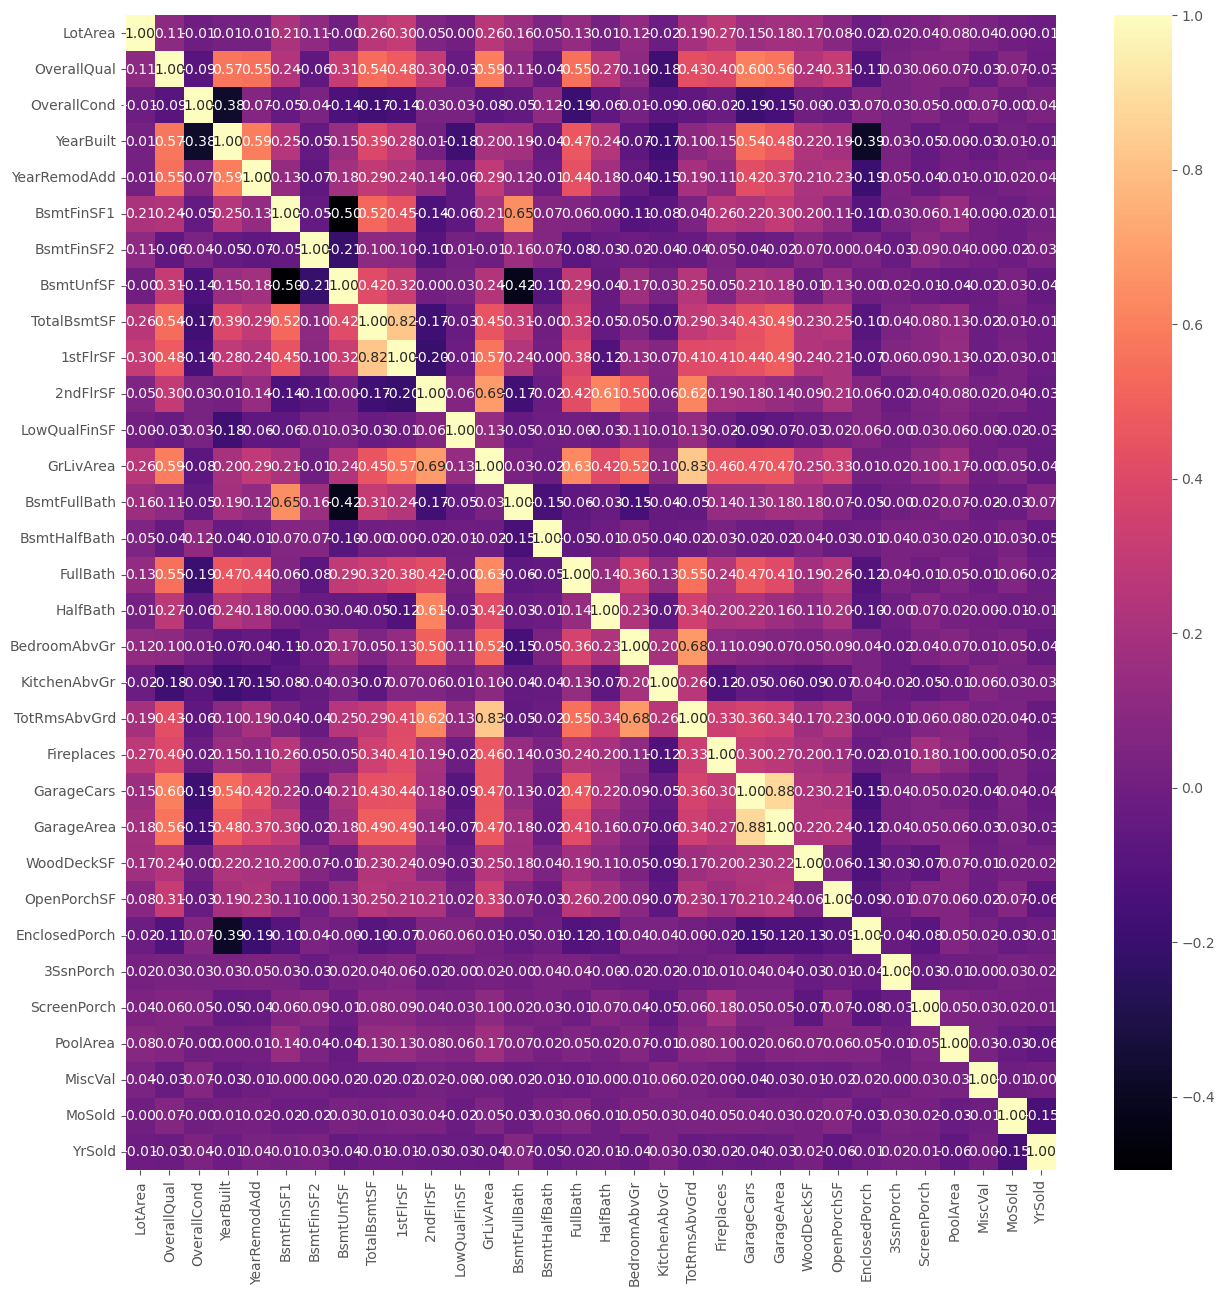

In [17]:
plt.figure(figsize = (15, 15))
sn.heatmap(housePrice.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

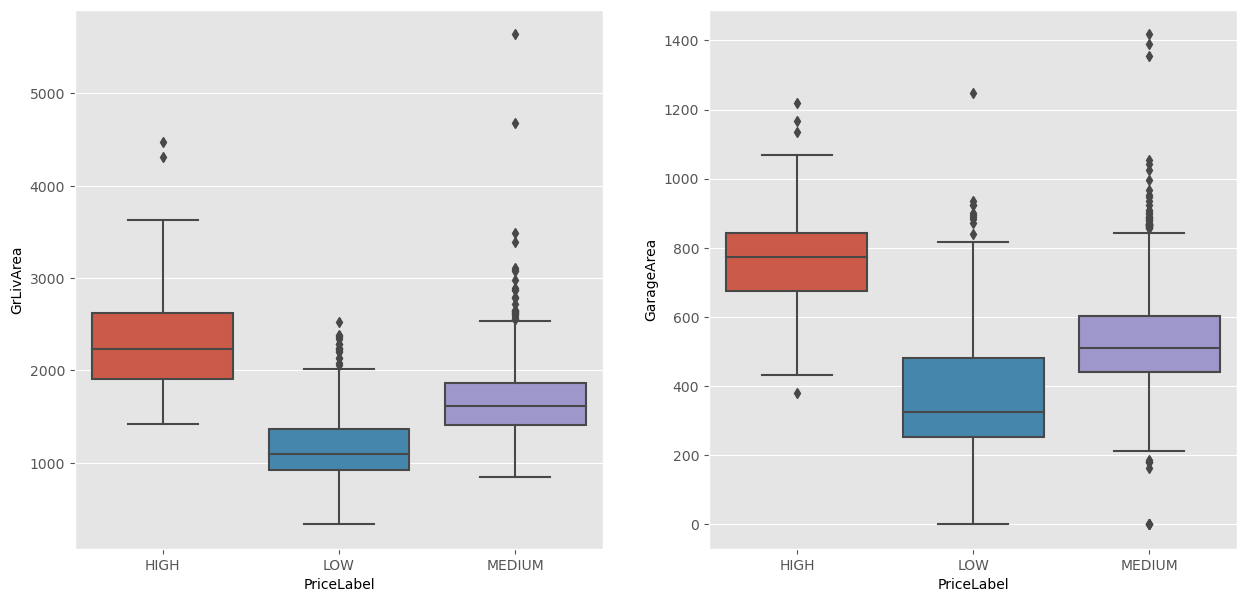

In [18]:
# 6.2 box plot
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sn.boxplot(y = 'GrLivArea', x = 'PriceLabel', data = housePrice, ax = ax[0])
sn.boxplot(y = 'GarageArea', x = 'PriceLabel', data = housePrice, ax = ax[1])

plt.show()

# Data preparation

## 1. Data Cleaning
### 1.1 Fill in missing values

In [19]:
for i in housePrice.isnull().sum():
    if (i != 0):
        print(i)

**There does not exist missing value of blank or NULL**

### 1.2. Identify and remove noise

In [20]:
housePrice.dtypes

MSSubClass         object
MSZoning           object
LotFrontage        object
LotArea             int64
Street             object
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
PriceLabel       category
Length: 80, dtype: object

In [21]:
# find out if the str attribute are same to the author's version. 
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        print(column , ":",unique_list)

MSSubClass : [160, 70, 40, 75, 45, 80, 50, 20, 85, 180, 30, 120, 90, 60, 190]
MSZoning : ['RL', 'C (all)', 'RH', 'RM', 'FV']
LotFrontage : ['42', '118', '116', '69', '62', '54', '107', '68', '79', '52', '59', '39', '94', '86', '34', '21', '64', '313', '44', '98', '90', '32', '85', '134', '114', '130', '61', '92', '160', '89', '58', '128', '45', '97', '81', '182', '24', '37', '76', '112', '122', '74', '35', '38', '153', '99', '140', '152', '30', '72', '104', '65', '144', '33', '115', '110', '53', '149', '48', '78', 'NA', '108', '77', '71', '87', '41', '105', '111', '82', '47', '84', '66', '56', '93', '50', '96', '43', '40', '141', '103', '75', '80', '36', '137', '95', '150', '106', '100', '102', '60', '174', '138', '129', '88', '91', '46', '63', '55', '83', '70', '109', '49', '168', '51', '124', '67', '57', '120', '121', '101', '73']
Street : ['Grvl', 'Pave']
Alley : ['Grvl', 'NA', 'Pave']
LotShape : ['IR2', 'IR3', 'IR1', 'Reg']
LandContour : ['Bnk', 'Low', 'Lvl', 'HLS']
Utilities : ['N

In [22]:
housePrice['MasVnrType'].value_counts()


None       864
BrkFace    445
Stone      128
BrkCmn      15
NA           8
Name: MasVnrType, dtype: int64

In [23]:
housePrice = housePrice[housePrice['MasVnrType'] != 'NA']

Find an element that there isn't inside the column that contains the value NA to replace

In [24]:
for column in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    columnSeriesObj = housePrice[column]
    unique_list = list(set(columnSeriesObj.values))
    print(column , ":",unique_list)
    if '0' in unique_list:
        print(column)
        break

LotFrontage : ['42', '118', '116', '69', '62', '54', '107', '68', '79', '52', '59', '39', '94', '86', '34', '21', '64', '313', '44', '98', '90', '32', '85', '134', '114', '130', '61', '92', '160', '89', '58', '128', '45', '97', '81', '182', '24', '37', '76', '112', '122', '74', '35', '38', '153', '99', '140', '152', '30', '72', '104', '65', '144', '33', '115', '110', '53', '149', '48', '78', 'NA', '108', '77', '71', '87', '41', '105', '111', '82', '47', '84', '66', '56', '93', '50', '96', '43', '40', '141', '103', '75', '80', '36', '137', '95', '150', '106', '100', '102', '60', '174', '138', '129', '88', '91', '46', '63', '55', '83', '70', '109', '49', '168', '51', '124', '67', '57', '120', '121', '101', '73']
MasVnrArea : ['768', '147', '42', '143', '280', '68', '528', '180', '126', '975', '510', '223', '506', '335', '260', '424', '312', '178', '114', '480', '435', '922', '415', '160', '428', '161', '450', '468', '192', '31', '464', '142', '258', '182', '24', '170', '491', '244', '324

In [25]:
for column in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    columnSeriesObj = housePrice[column]
    unique_list = list(set(columnSeriesObj.values))
    # print(column , ":",unique_list)
    if '-1' in unique_list:
        print(column)
        break

In [26]:
housePrice['LotFrontage'].replace('NA', -1, inplace=True)
housePrice['LotFrontage'] = housePrice['LotFrontage'].astype(float)
housePrice['LotFrontage'].replace(-1, housePrice['LotFrontage'].mean(), inplace=True)

housePrice['MasVnrArea'].replace('NA', -1, inplace=True)
housePrice['MasVnrArea'] = housePrice['MasVnrArea'].astype(float)
housePrice['MasVnrArea'].replace(-1, housePrice['MasVnrArea'].mean(), inplace=True)

housePrice['GarageYrBlt'].replace('NA', -1, inplace=True)
housePrice['GarageYrBlt'] = housePrice['GarageYrBlt'].astype(float)
housePrice['GarageYrBlt'].replace(-1, housePrice['GarageYrBlt'].mean(), inplace=True)


    
    
# find out if the str attribute are same to the author's version. 
# Check the result again
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        print(column , ":",unique_list)

MSSubClass : [160, 70, 40, 75, 45, 80, 50, 20, 85, 180, 30, 120, 90, 60, 190]
MSZoning : ['RL', 'C (all)', 'RH', 'RM', 'FV']
Street : ['Grvl', 'Pave']
Alley : ['Grvl', 'NA', 'Pave']
LotShape : ['IR2', 'IR3', 'IR1', 'Reg']
LandContour : ['Bnk', 'Low', 'Lvl', 'HLS']
Utilities : ['NoSeWa', 'AllPub']
LotConfig : ['Corner', 'FR2', 'FR3', 'Inside', 'CulDSac']
LandSlope : ['Gtl', 'Mod', 'Sev']
Neighborhood : ['Timber', 'Gilbert', 'CollgCr', 'Veenker', 'Crawfor', 'NAmes', 'NPkVill', 'OldTown', 'MeadowV', 'Mitchel', 'BrkSide', 'BrDale', 'Edwards', 'StoneBr', 'SWISU', 'Sawyer', 'SawyerW', 'NoRidge', 'Somerst', 'NWAmes', 'NridgHt', 'ClearCr', 'Blmngtn', 'Blueste', 'IDOTRR']
Condition1 : ['RRNe', 'RRNn', 'PosA', 'RRAe', 'PosN', 'RRAn', 'Feedr', 'Artery', 'Norm']
Condition2 : ['RRNn', 'PosA', 'RRAe', 'PosN', 'RRAn', 'Feedr', 'Artery', 'Norm']
BldgType : ['2fmCon', 'Duplex', 'Twnhs', '1Fam', 'TwnhsE']
HouseStyle : ['2.5Fin', '2Story', '1.5Fin', 'SLvl', '1Story', 'SFoyer', '1.5Unf', '2.5Unf']
RoofSty

In [27]:
# if there exist NA, the type of int will print error.
for column in housePrice:
    if(housePrice.dtypes[column] == 'int64'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        print(column , ":",unique_list)

LotArea : [10240, 8197, 8198, 8199, 8200, 10246, 6155, 18450, 8212, 10261, 4118, 10264, 28698, 10267, 14364, 6173, 6171, 4130, 6180, 12327, 14375, 12328, 8235, 10289, 8244, 8246, 12342, 8248, 8250, 10300, 6204, 10304, 20544, 12354, 2117, 12358, 8263, 10316, 10320, 16466, 12376, 8281, 12378, 8280, 10335, 6240, 12384, 8294, 12393, 14442, 12394, 16492, 24682, 12400, 2160, 14450, 10355, 10356, 10357, 8314, 10364, 6270, 4224, 12416, 8320, 12420, 4230, 10380, 10382, 8335, 10386, 12435, 8339, 6292, 12438, 4251, 10395, 6300, 12444, 10400, 6305, 10402, 16545, 12456, 2217, 10410, 12461, 8366, 4270, 12464, 16560, 6324, 10420, 10421, 4280, 12474, 4282, 39104, 8385, 10434, 10437, 6342, 10440, 8393, 14536, 12493, 215245, 14541, 8400, 10448, 8402, 10452, 8405, 8410, 12508, 2268, 8414, 14559, 10463, 12513, 6371, 2280, 10475, 6380, 14572, 8430, 10480, 2289, 10482, 14585, 12537, 16635, 14587, 8445, 53504, 10496, 8450, 6402, 10500, 2308, 14598, 16647, 12552, 14601, 12546, 8461, 8462, 16659, 6420, 8470, 8

1stFlrSF : [2053, 2069, 2073, 2084, 2097, 2110, 2113, 2117, 2121, 2129, 2136, 2156, 2158, 2196, 2207, 2217, 2223, 2234, 2259, 2364, 334, 2392, 2402, 2411, 372, 2444, 438, 2524, 480, 483, 495, 520, 525, 526, 536, 546, 551, 561, 572, 575, 576, 581, 2633, 596, 4692, 600, 605, 612, 616, 624, 625, 626, 630, 649, 658, 660, 661, 663, 664, 672, 673, 676, 679, 680, 682, 684, 686, 689, 691, 693, 694, 696, 697, 698, 702, 703, 707, 708, 713, 716, 720, 725, 728, 729, 734, 735, 736, 738, 741, 742, 747, 750, 751, 752, 753, 754, 755, 756, 757, 760, 764, 765, 767, 768, 769, 770, 772, 773, 774, 778, 779, 780, 783, 784, 786, 788, 789, 790, 792, 793, 794, 796, 798, 799, 800, 802, 803, 804, 806, 807, 808, 810, 811, 812, 813, 814, 815, 816, 818, 820, 824, 825, 827, 829, 831, 832, 833, 835, 838, 840, 841, 842, 845, 846, 847, 848, 849, 2898, 851, 854, 855, 856, 858, 859, 860, 861, 864, 865, 866, 869, 872, 874, 875, 876, 877, 879, 880, 882, 884, 885, 886, 887, 888, 889, 892, 893, 894, 896, 897, 899, 900, 901, 

### 1.3 correct inconsistencies
**Because there only one dataset, so does not exist inconsistencies problem.**

### 2. Data integration
#### 2.1 Merge data from multiple sources.

In [28]:
import math

def entropy(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    # Convert labels to integers
    label_dict = {label: i for i, label in enumerate(set(labels))}
    labels = [label_dict[label] for label in labels]

    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    for i in probs:
        ent -= i * math.log(i, n_classes)

    return ent

In [29]:
# Feature Subset Selection - remove the irrelevant or redundant features
print("column", "entropy")
for val in housePrice:
    if(entropy(housePrice[val]) < 0.2):
        print(val, entropy(housePrice[val]))
        housePrice.drop([val], axis=1, inplace=True)

column entropy
Street 0.03867179086376495
Utilities 0.00822728916596679
Condition2 0.036174442310906954
RoofMatl 0.05626687794698614
BsmtFinSF2 0.18522092992690442
Heating 0.07381802515224392
Electrical 0.19925256135353578
LowQualFinSF 0.045591126668858194
KitchenAbvGr 0.14192550281429317
Functional 0.17978388267992745
3SsnPorch 0.04392901292644207
ScreenPorch 0.14061606664731202
PoolArea 0.019192209192862825
PoolQC 0.02577354536568422
MiscFeature 0.10812128553221684
MiscVal 0.08125194096300384


In [30]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1452 non-null   object  
 1   MSZoning       1452 non-null   object  
 2   LotFrontage    1452 non-null   float64 
 3   LotArea        1452 non-null   int64   
 4   Alley          1452 non-null   object  
 5   LotShape       1452 non-null   object  
 6   LandContour    1452 non-null   object  
 7   LotConfig      1452 non-null   object  
 8   LandSlope      1452 non-null   object  
 9   Neighborhood   1452 non-null   object  
 10  Condition1     1452 non-null   object  
 11  BldgType       1452 non-null   object  
 12  HouseStyle     1452 non-null   object  
 13  OverallQual    1452 non-null   int64   
 14  OverallCond    1452 non-null   int64   
 15  YearBuilt      1452 non-null   int64   
 16  YearRemodAdd   1452 non-null   int64   
 17  RoofStyle      1452 non-null   ob

In [31]:
# Feature creation
# conbine OverallQual+OverallCond 
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
housePrice['OverallQualCond'] = housePrice['OverallQual'] + housePrice['OverallCond']
housePrice.drop(['OverallQual'], axis=1, inplace=True)
housePrice.drop(['OverallCond'], axis=1, inplace=True)

# aggregation operation on quantitative attribute

# housePrice.groupby(['YearBuilt']).mean()


In [32]:
housePrice.dtypes

MSSubClass           object
MSZoning             object
LotFrontage         float64
LotArea               int64
Alley                object
                     ...   
YrSold                int64
SaleType             object
SaleCondition        object
PriceLabel         category
OverallQualCond       int64
Length: 63, dtype: object

In [33]:
housePrice

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,PriceLabel,OverallQualCond
0,60,RL,65.0,8450,NA,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,NA,2,2008,WD,Normal,MEDIUM,12
1,20,RL,80.0,9600,NA,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,NA,5,2007,WD,Normal,MEDIUM,14
2,60,RL,68.0,11250,NA,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,NA,9,2008,WD,Normal,MEDIUM,12
3,70,RL,60.0,9550,NA,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,272,NA,2,2006,WD,Abnorml,LOW,12
4,60,RL,84.0,14260,NA,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,NA,12,2008,WD,Normal,MEDIUM,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NA,Reg,Lvl,Inside,Gtl,Gilbert,...,0,40,0,NA,8,2007,WD,Normal,MEDIUM,11
1456,20,RL,85.0,13175,NA,Reg,Lvl,Inside,Gtl,NWAmes,...,349,0,0,MnPrv,2,2010,WD,Normal,MEDIUM,12
1457,70,RL,66.0,9042,NA,Reg,Lvl,Inside,Gtl,Crawfor,...,0,60,0,GdPrv,5,2010,WD,Normal,MEDIUM,16
1458,20,RL,68.0,9717,NA,Reg,Lvl,Inside,Gtl,NAmes,...,366,0,112,NA,4,2010,WD,Normal,LOW,11


## Modeling

### Random Forest

In [34]:
models = []

In [35]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [36]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from joblib import dump
import random

X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded

kf = KFold(n_splits=5)
# the n_estimators parameter specifies the number of decision trees in the random forest
rfc = RandomForestClassifier(n_estimators=30)
best_score = 0


for train_index, test_index in kf.split(X):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train, X_test = X[train_index], X[test_index]

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_model = rfc
        print(best_score)
    
dump(best_model, 'random_forest.joblib')

0.852233676975945
0.896551724137931


['random_forest.joblib']

In [37]:
from sklearn.metrics import confusion_matrix
import joblib

# Load the saved model
model = joblib.load('random_forest.joblib')

# Predict the test data
y_pred = model.predict(X_test)

models.append(("Random Forest", model, model.predict_proba(X_test), y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix\n',cm)


confusion_matrix
 [[  8   0  10]
 [  0 117   8]
 [  0  21 126]]


Random Forest


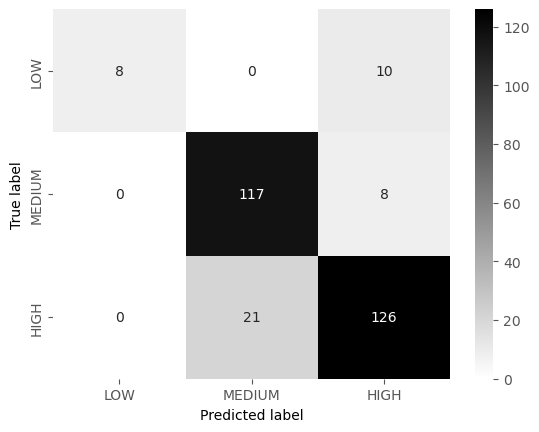

In [38]:
categories = ['LOW', 'MEDIUM', 'HIGH']
print("Random Forest")
make_confusion_matrix(confusion_matrix(y_test, y_pred), categories=categories, cmap='binary')

In [39]:
#print('Accuracy:', accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Randomforest report')
print(classification_report(y_test, y_pred))

Accuracy: 0.8655172413793103
Randomforest report
              precision    recall  f1-score   support

        HIGH       1.00      0.44      0.62        18
         LOW       0.85      0.94      0.89       125
      MEDIUM       0.88      0.86      0.87       147

    accuracy                           0.87       290
   macro avg       0.91      0.75      0.79       290
weighted avg       0.87      0.87      0.86       290



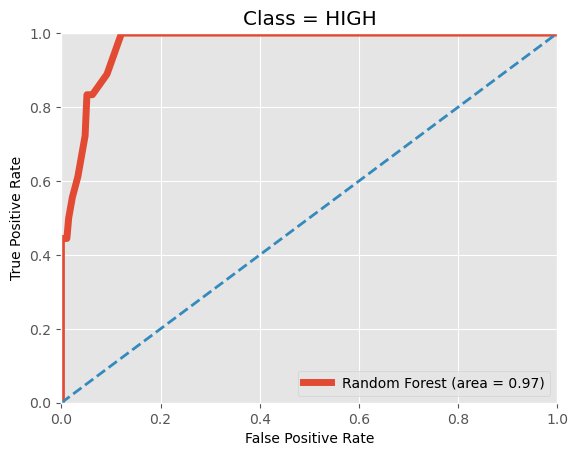

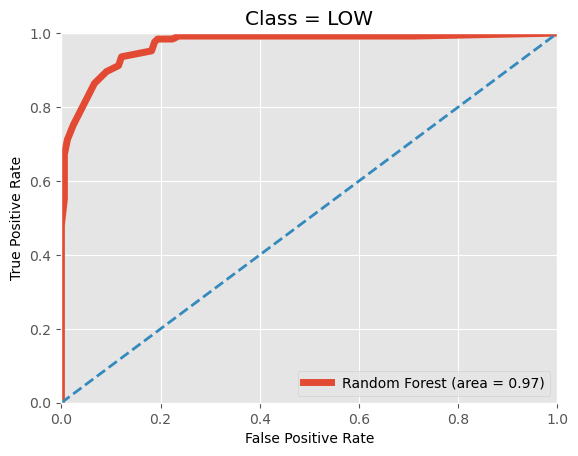

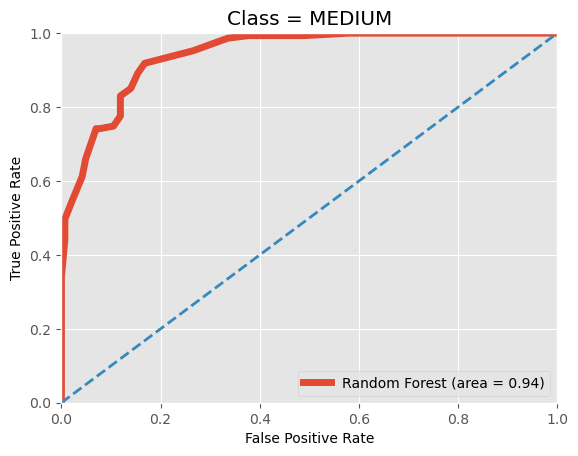

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model.predict_proba(X_test)[:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="Random Forest" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

### Neural Network

Converting categorical values into numeric using the sklearn library and in particular the OneHotEncoding class

In [41]:
X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded

Creating a training set and a test set

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1016, 7266)
(436, 7266)


Creation of the neural network with parameters tested on different ranges. As an activation function we use 'relu' because it fits better with our training set as a solver we use 'sgd'. The parameters alpha, can be used to control possible 'overfitting' and 'underfitting has been chosen over a range as well as tolerance.

mlp.fit allows you to fit the model to the training data
mlp.predict allows you to predict the training and test set

In [43]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(5,5), 
                        activation='relu', 
                        random_state=1,
                        alpha=0.030888435964774818,
                        max_iter=1000,
                        solver='sgd', 
                        tol=1e-5,
                        learning_rate_init=0.1, 
                        verbose=False)

mlp.fit(X_train,y_train)

predict_train_mlp = mlp.predict(X_train)
predict_test_mlp = mlp.predict(X_test)

models.append(("Neural Network", mlp, mlp.predict_proba(X_test), y_test, mlp.predict(X_test)))

In [44]:
from sklearn.metrics import classification_report
print("PREDICTION TRAINING SET")
print(confusion_matrix(y_train,predict_train_mlp))
print(classification_report(y_train,predict_train_mlp))

PREDICTION TRAINING SET
[[ 77   0   0]
 [  0 432   0]
 [  0   0 507]]
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00        77
         LOW       1.00      1.00      1.00       432
      MEDIUM       1.00      1.00      1.00       507

    accuracy                           1.00      1016
   macro avg       1.00      1.00      1.00      1016
weighted avg       1.00      1.00      1.00      1016



In [45]:
print("PREDICTION TEST SET")
print(confusion_matrix(y_test,predict_test_mlp))
print(classification_report(y_test,predict_test_mlp))

PREDICTION TEST SET
[[ 22   0  15]
 [  0 167  20]
 [  8  27 177]]
              precision    recall  f1-score   support

        HIGH       0.73      0.59      0.66        37
         LOW       0.86      0.89      0.88       187
      MEDIUM       0.83      0.83      0.83       212

    accuracy                           0.84       436
   macro avg       0.81      0.77      0.79       436
weighted avg       0.84      0.84      0.84       436



In [46]:
print(f'Accuracy: {accuracy_score(y_test, predict_test_mlp):.2f}')

Accuracy: 0.84


#### Evaluation Neural Network

In [47]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

Neural Network


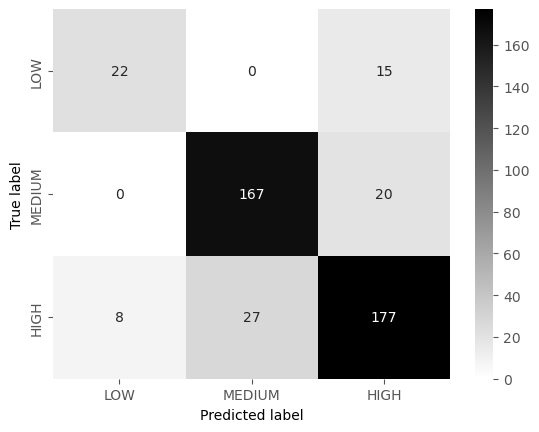

In [48]:
categories = ['LOW', 'MEDIUM', 'HIGH']
print("Neural Network")
make_confusion_matrix(confusion_matrix(y_test, predict_test_mlp), categories=categories, cmap='binary')

In [49]:
print('Classification report')
print(classification_report(y_test, predict_test_mlp))

Classification report
              precision    recall  f1-score   support

        HIGH       0.73      0.59      0.66        37
         LOW       0.86      0.89      0.88       187
      MEDIUM       0.83      0.83      0.83       212

    accuracy                           0.84       436
   macro avg       0.81      0.77      0.79       436
weighted avg       0.84      0.84      0.84       436



Compute the Roc Curve for each class

In [50]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

In [51]:
probs = {}

probs["Neural Network"] = mlp.predict_proba(X_test)

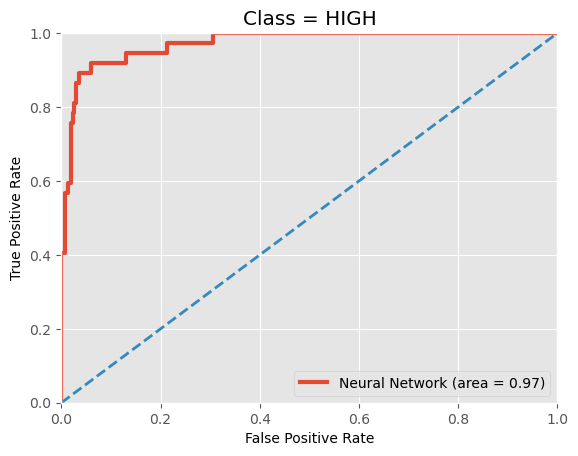

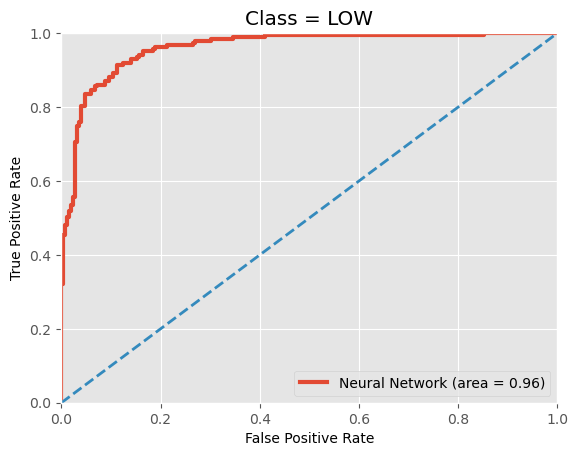

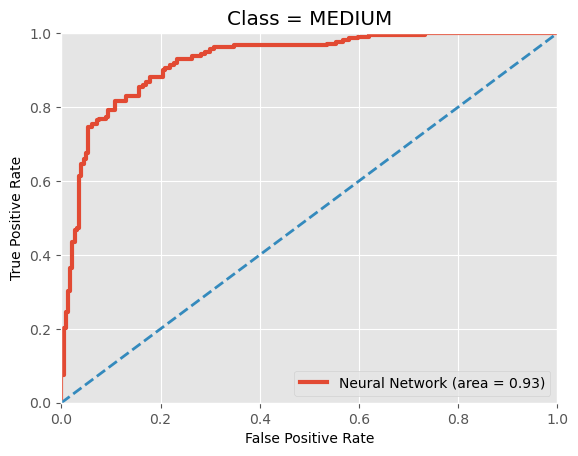

In [52]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=3, label="Neural Network" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[5.92743720e-13 6.34106750e-05 1.51705019e-13 4.03843525e-05
 5.38743576e-15 2.52593724e-15 7.60672340e-13 6.880362

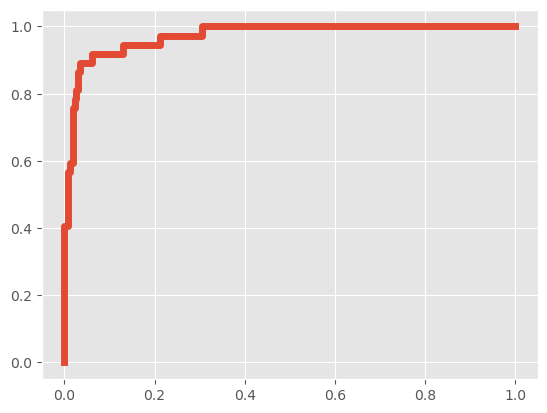

In [53]:
fpr = dict()
tpr = dict()
roc_auc = dict()
m = 0
for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [54]:
one_hot_encoding[:, 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [55]:
probs["Neural Network"][:, 0]

array([5.92743720e-13, 6.34106750e-05, 1.51705019e-13, 4.03843525e-05,
       5.38743576e-15, 2.52593724e-15, 7.60672340e-13, 6.88036286e-05,
       1.09519316e-02, 6.45255314e-16, 1.71179688e-02, 8.39597945e-03,
       1.16511672e-16, 4.67403110e-06, 5.06951223e-19, 3.71765077e-08,
       7.09269353e-14, 9.96044018e-01, 3.44184827e-05, 5.11737777e-05,
       1.01364338e-17, 5.35972642e-08, 1.11429382e-07, 1.50280278e-17,
       2.36757484e-12, 1.19261875e-11, 8.38822815e-12, 1.28769728e-16,
       6.81702854e-17, 9.99304296e-01, 3.80417779e-07, 7.38261618e-02,
       9.98540988e-01, 5.70122008e-04, 4.97182345e-16, 5.54042112e-11,
       3.35226330e-09, 1.37240596e-16, 2.54382056e-05, 2.19850223e-14,
       9.99184153e-06, 3.54201551e-14, 7.25267455e-03, 1.93349789e-05,
       3.61285543e-18, 4.07694031e-11, 1.46491979e-07, 6.34187453e-05,
       3.94181885e-08, 6.75327018e-06, 4.08952872e-02, 3.96183235e-07,
       3.54023479e-04, 4.85207217e-16, 9.99139524e-01, 1.15961399e-06,
      

In [56]:
roc_curve(one_hot_encoding[:, 0], probs["Neural Network"][:, 0])

(array([0.        , 0.        , 0.        , 0.0075188 , 0.0075188 ,
        0.01253133, 0.01253133, 0.02005013, 0.02005013, 0.02255639,
        0.02255639, 0.02506266, 0.02506266, 0.03007519, 0.03007519,
        0.03508772, 0.03508772, 0.06015038, 0.06015038, 0.13032581,
        0.13032581, 0.21303258, 0.21303258, 0.30576441, 0.30576441,
        1.        ]),
 array([0.        , 0.02702703, 0.40540541, 0.40540541, 0.56756757,
        0.56756757, 0.59459459, 0.59459459, 0.75675676, 0.75675676,
        0.78378378, 0.78378378, 0.81081081, 0.81081081, 0.86486486,
        0.86486486, 0.89189189, 0.89189189, 0.91891892, 0.91891892,
        0.94594595, 0.94594595, 0.97297297, 0.97297297, 1.        ,
        1.        ]),
 array([1.99930430e+00, 9.99304296e-01, 9.90785780e-01, 9.73599902e-01,
        7.73829962e-01, 6.66905265e-01, 6.52028546e-01, 5.37796514e-01,
        2.47026167e-01, 2.10305240e-01, 1.50130506e-01, 9.32968293e-02,
        7.38261618e-02, 6.58907204e-02, 4.25444337e-02, 3.87

### Adaboost

In [57]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation

In [58]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=110, learning_rate=1)

# Train Adaboost Classifer
abc = abc.fit(X_train, y_train)

models.append(("AdaBoost", abc, abc.predict_proba(X_test), y_test, abc.predict(X_test)))

#Predict the response for test dataset
y_pred = abc.predict(X_test)

In [59]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8027522935779816


In [60]:
predict_train_abc = abc.predict(X_train)
predict_test_abc = abc.predict(X_test)

AdaBoost


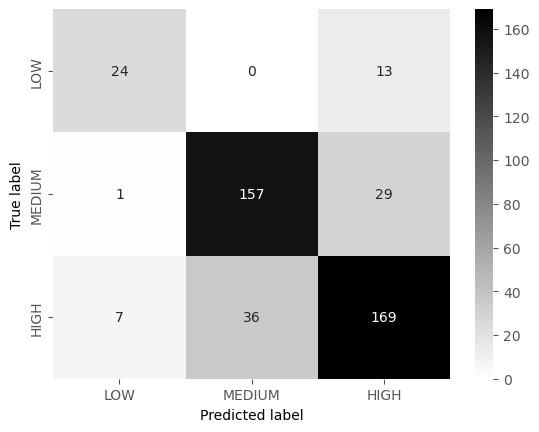

In [61]:
categories = ['LOW', 'MEDIUM', 'HIGH']
print("AdaBoost")
make_confusion_matrix(confusion_matrix(y_test, predict_test_abc), categories=categories, cmap='binary')

In [62]:
print('Classification report')
print(classification_report(y_test, predict_test_abc))

Classification report
              precision    recall  f1-score   support

        HIGH       0.75      0.65      0.70        37
         LOW       0.81      0.84      0.83       187
      MEDIUM       0.80      0.80      0.80       212

    accuracy                           0.80       436
   macro avg       0.79      0.76      0.77       436
weighted avg       0.80      0.80      0.80       436



In [63]:
probs["AdaBoost"] = abc.predict_proba(X_test)

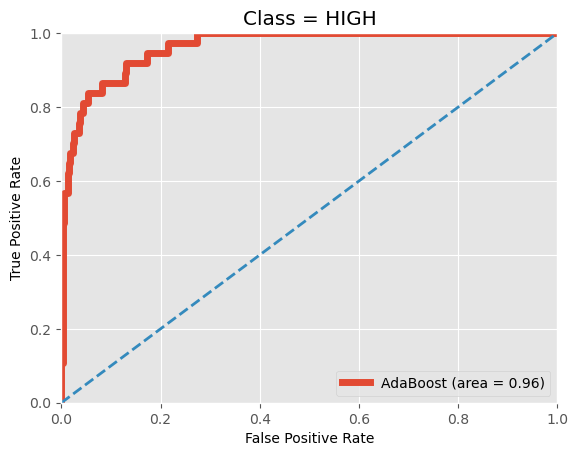

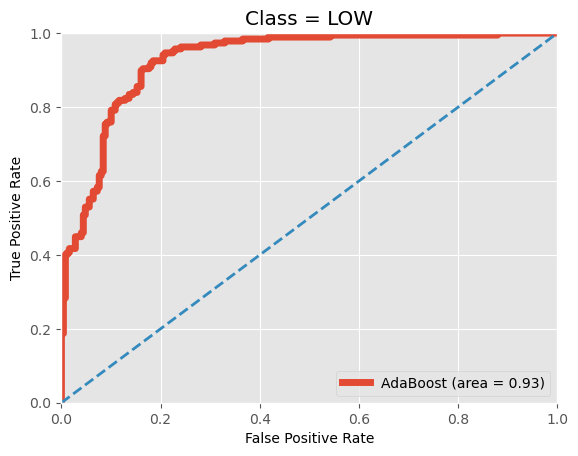

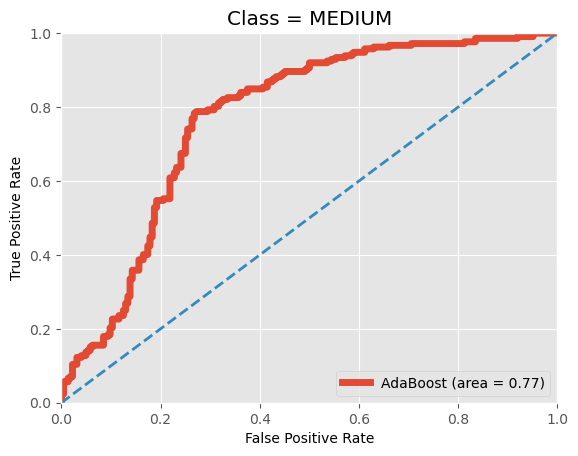

In [64]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="AdaBoost" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.14757261 0.33758849 0.18250216 0.25171804 0.11658742 0.12300666
 0.0982205  0.27548776 0.3746124  0.09150982 0.2

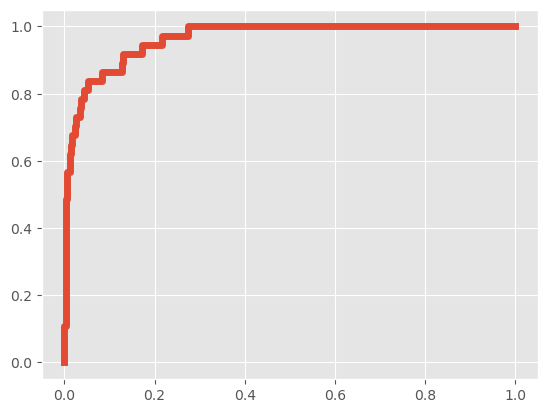

In [65]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [66]:
one_hot_encoding[:, 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [67]:
probs["AdaBoost"][:, 0]

array([0.14757261, 0.33758849, 0.18250216, 0.25171804, 0.11658742,
       0.12300666, 0.0982205 , 0.27548776, 0.3746124 , 0.09150982,
       0.26406053, 0.34336701, 0.16666288, 0.35002732, 0.15955594,
       0.1696613 , 0.19460981, 0.45717697, 0.26512668, 0.26913671,
       0.11051947, 0.12857735, 0.22541396, 0.12661477, 0.11125479,
       0.16783651, 0.13667862, 0.08654106, 0.10267441, 0.49464425,
       0.19312535, 0.30616734, 0.47184341, 0.24852754, 0.14781875,
       0.132295  , 0.17116273, 0.10263435, 0.12951243, 0.1782014 ,
       0.19826577, 0.10640516, 0.31284195, 0.21660281, 0.09084947,
       0.13796615, 0.2316322 , 0.27912885, 0.18092221, 0.20658269,
       0.34944279, 0.21167792, 0.29365201, 0.116229  , 0.49803667,
       0.20745087, 0.14614601, 0.4404279 , 0.41100003, 0.33027036,
       0.18423519, 0.29463324, 0.22298066, 0.12878902, 0.25764866,
       0.33069673, 0.35299842, 0.09982298, 0.30522776, 0.15851246,
       0.15694972, 0.21858482, 0.13165572, 0.34611281, 0.10342

In [68]:
roc_curve(one_hot_encoding[:, 0], probs["AdaBoost"][:, 0])

(array([0.        , 0.        , 0.        , 0.00250627, 0.00250627,
        0.00501253, 0.00501253, 0.01253133, 0.01253133, 0.01503759,
        0.01503759, 0.01754386, 0.01754386, 0.02255639, 0.02255639,
        0.02506266, 0.02506266, 0.03508772, 0.03508772, 0.03759398,
        0.03759398, 0.04260652, 0.04260652, 0.05263158, 0.05263158,
        0.07017544, 0.07518797, 0.08270677, 0.08270677, 0.12781955,
        0.12781955, 0.13032581, 0.13032581, 0.17293233, 0.17293233,
        0.21553885, 0.21553885, 0.27318296, 0.27318296, 0.3283208 ,
        0.33333333, 0.44360902, 0.44862155, 0.45112782, 0.45864662,
        0.60401003, 0.60902256, 0.87969925, 0.88471178, 1.        ]),
 array([0.        , 0.02702703, 0.10810811, 0.10810811, 0.48648649,
        0.48648649, 0.56756757, 0.56756757, 0.62162162, 0.62162162,
        0.64864865, 0.64864865, 0.67567568, 0.67567568, 0.7027027 ,
        0.7027027 , 0.72972973, 0.72972973, 0.75675676, 0.75675676,
        0.78378378, 0.78378378, 0.81081081, 0.

### Naive Bayes

In [69]:
X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40
)
X_train.shape, X_test.shape

((1016, 7266), (436, 7266))

In [70]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

dense_array = X_train.toarray()
dense_test= X_test.toarray()
# fit the model
gnb.fit(dense_array, y_train)

models.append(("Naive Bayes", gnb, gnb.predict_proba(dense_test), y_test, gnb.predict(dense_test)))

dump(gnb, 'GaussianNB.joblib')

['GaussianNB.joblib']

In [71]:
y_pred = gnb.predict(dense_test)

y_pred

array(['MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'LOW', 'LOW', 'LOW', 'LOW',
       'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM', 'LOW',
       'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM',
       'MEDIUM', 'LOW', 'LOW', 'LOW', 'MEDIUM', 'LOW', 'LOW', 'HIGH',
       'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'LOW', 'MEDIUM', 'LOW',
       'MEDIUM', 'LOW', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM',
       'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM',
       'MEDIUM', 'LOW', 'MEDIUM', 'LOW', 'LOW', 'MEDIUM', 'MEDIUM',
       'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'LOW', 'MEDIUM', 'MEDIUM',
       'HIGH', 'LOW', 'LOW', 'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM',
       'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW',
       'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM',
       'LOW', 'LOW', 'LOW', 'MEDIUM', 'LOW', 'MEDIUM', 'LOW', 'MEDIUM',
       'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM',
       'MEDIU

Model accuracy 

In [72]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7133


In [73]:
y_pred_train = gnb.predict(dense_array)

y_pred_train

array(['HIGH', 'LOW', 'HIGH', ..., 'MEDIUM', 'MEDIUM', 'MEDIUM'],
      dtype='<U6')

In [74]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9990


we are comparing model accuracy with null accuracy

In [75]:
y_test.value_counts()

MEDIUM    212
LOW       187
HIGH       37
Name: PriceLabel, dtype: int64

In [76]:
null_accuracy = (240/(240+173+25))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5479


Confusing matrix

In [77]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  6   3  28]
 [  0 144  43]
 [  3  48 161]]


<Axes: >

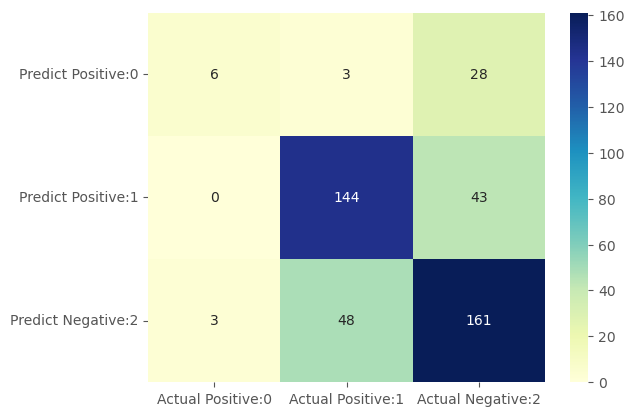

In [78]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:0','Actual Positive:1', 'Actual Negative:2'], 
                                 index=['Predict Positive:0','Predict Positive:1', 'Predict Negative:2'])
sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        HIGH       0.67      0.16      0.26        37
         LOW       0.74      0.77      0.75       187
      MEDIUM       0.69      0.76      0.73       212

    accuracy                           0.71       436
   macro avg       0.70      0.56      0.58       436
weighted avg       0.71      0.71      0.70       436



In [80]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
Tn = cm[2,2]
Fn = cm[0,2]
fn = cm[1,2]

In [81]:
classification_accuracy = (TP + TN + Tn) / float(TP + TN + FP + FN + Tn + Fn + fn)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8078


In [82]:
classification_error = (FP + FN + fn + Fn) / float(TP + TN + FP + FN + fn + Fn + Tn)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1922


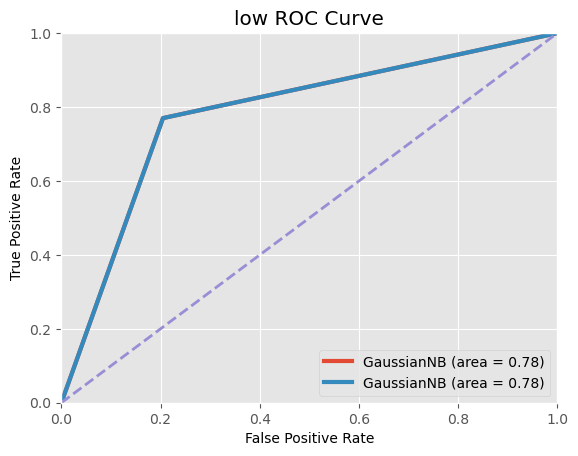

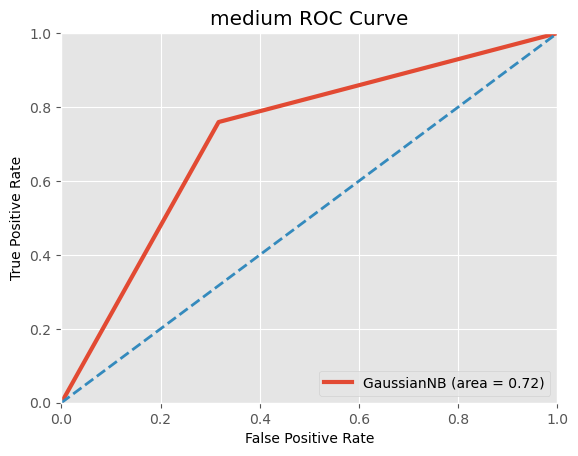

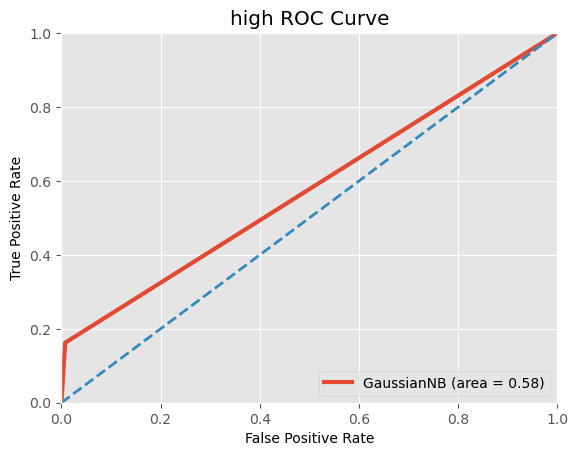

In [83]:
# Load the joblib file
model = joblib.load('GaussianNB.joblib')


# Get the predicted probabilities for the test set
y_pred_high = model.predict_proba(dense_test)[:, 0]

# Get the predicted probabilities for the test set
y_pred_low = model.predict_proba(dense_test)[:, 1]

# Get the predicted probabilities for the test set
y_pred_medium = model.predict_proba(dense_test)[:, 2]


# Compute the false positive rate and true positive rate
fpr_low, tpr_low, thresholds = roc_curve(y_test, y_pred_low,pos_label='LOW')
#plt.plot(fpr_low, tpr_low)
roc_auc_low = metrics.auc(fpr_low, tpr_low)
plt.plot(fpr_low, tpr_low, lw=3, label="GaussianNB" + f' (area = {roc_auc_low:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('low ROC Curve')
plt.legend(loc='lower right')
from sklearn.metrics import roc_curve, auc
import joblib
from sklearn.preprocessing import OneHotEncoder
# Load the joblib file
model = joblib.load('GaussianNB.joblib')


# Get the predicted probabilities for the test set
y_pred_high = model.predict_proba(dense_test)[:, 0]

# Get the predicted probabilities for the test set
y_pred_low = model.predict_proba(dense_test)[:, 1]

# Get the predicted probabilities for the test set
y_pred_medium = model.predict_proba(dense_test)[:, 2]


# Compute the false positive rate and true positive rate
fpr_low, tpr_low, thresholds = roc_curve(y_test, y_pred_low,pos_label='LOW')
#plt.plot(fpr_low, tpr_low)
roc_auc_low = metrics.auc(fpr_low, tpr_low)
plt.plot(fpr_low, tpr_low, lw=3, label="GaussianNB" + f' (area = {roc_auc_low:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('low ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

fpr_medium, tpr_medium, thresholds = roc_curve(y_test, y_pred_medium,pos_label='MEDIUM')
roc_auc_medium = metrics.auc(fpr_medium, tpr_medium)
plt.plot(fpr_medium, tpr_medium, lw=3, label="GaussianNB" + f' (area = {roc_auc_medium:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('medium ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


fpr_high, tpr_high, thresholds = roc_curve(y_test, y_pred_high,pos_label='HIGH')
roc_auc_high = metrics.auc(fpr_high, tpr_high)
plt.plot(fpr_high, tpr_high, lw=3, label="GaussianNB" + f' (area = {roc_auc_high:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('high ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

In [84]:
print('Training set score: {:.4f}'.format(gnb.score(dense_array, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(dense_test, y_test)))

Training set score: 0.9990
Test set score: 0.7133


# Decision Tree

In [85]:
from sklearn.preprocessing import OneHotEncoder

X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1016, 7266)
(436, 7266)


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree classifier
dtc = DecisionTreeClassifier(criterion='gini')

# Perform grid search cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dtc = grid_search.best_estimator_

# Fit the best estimator on the training data
best_dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_dtc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Best Estimator:", best_dtc)

Accuracy: 0.7935779816513762
Best Estimator: DecisionTreeClassifier(max_depth=5)


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from joblib import dump


param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc = DecisionTreeClassifier(criterion='entropy')


# Perform grid search cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dtc = grid_search.best_estimator_

# Fit the best estimator on the training data
best_dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_dtc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the best model
dump(best_dtc, 'decision_tree.joblib')

Accuracy: 0.7775229357798165


['decision_tree.joblib']

### Evaluation(Decision Tree)

In [89]:
from sklearn.metrics import confusion_matrix
import joblib


# Load the saved model
model = joblib.load('decision_tree.joblib')

models.append(("Decision Tree", model, model.predict_proba(X_test), y_test, model.predict(X_test)))

# Predict the test data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix\n',cm)

confusion_matrix
 [[ 16   1  20]
 [  1 153  33]
 [  9  33 170]]


In [90]:
#print('Accuracy:', accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Decision Tree')
print(classification_report(y_test, y_pred))

Accuracy: 0.7775229357798165
Decision Tree
              precision    recall  f1-score   support

        HIGH       0.62      0.43      0.51        37
         LOW       0.82      0.82      0.82       187
      MEDIUM       0.76      0.80      0.78       212

    accuracy                           0.78       436
   macro avg       0.73      0.68      0.70       436
weighted avg       0.77      0.78      0.77       436



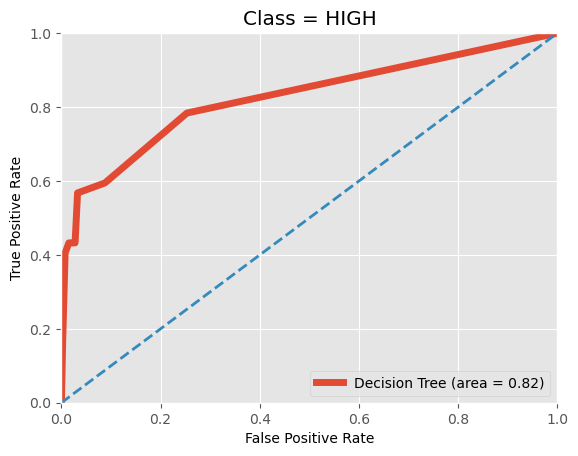

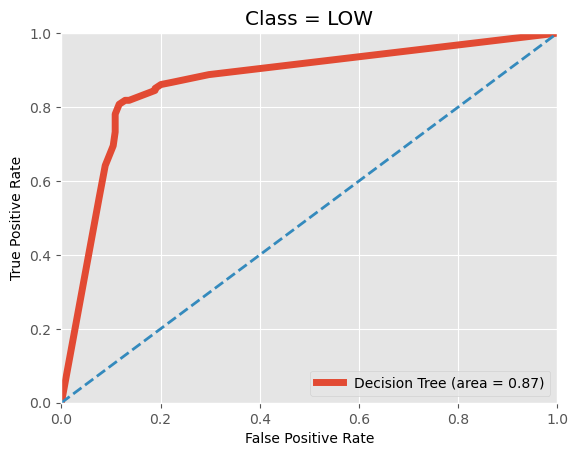

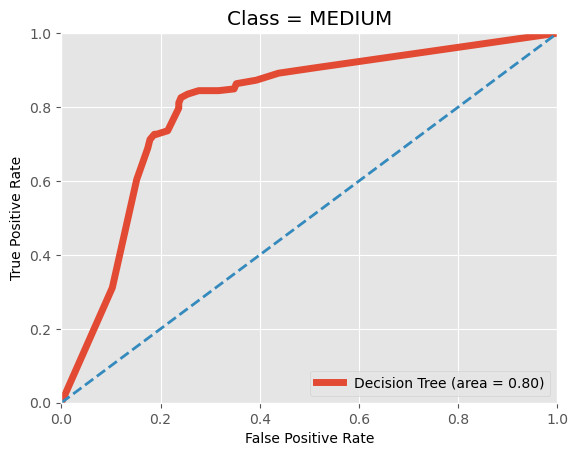

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model.predict_proba(X_test)[:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="Decision Tree" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

## Evaluation

In [92]:
import operator

accuracy = {}

for model in models:
    accuracy[model[0]] = metrics.accuracy_score(model[3], model[4])
    
sorted_accuracy = sorted(accuracy.items(), key=operator.itemgetter(1), reverse=True)

for x in sorted_accuracy:
     print("Accuracy " + str(x[0]) + ": " + str(x[1]))

Accuracy Random Forest: 0.8655172413793103
Accuracy Neural Network: 0.8394495412844036
Accuracy AdaBoost: 0.8027522935779816
Accuracy Decision Tree: 0.7775229357798165
Accuracy Naive Bayes: 0.713302752293578


Compare roc curve models

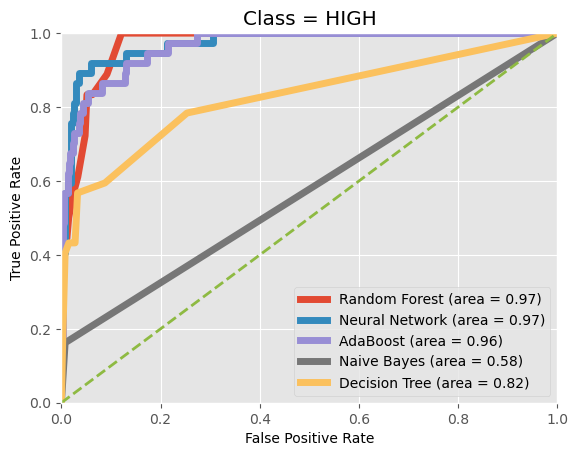

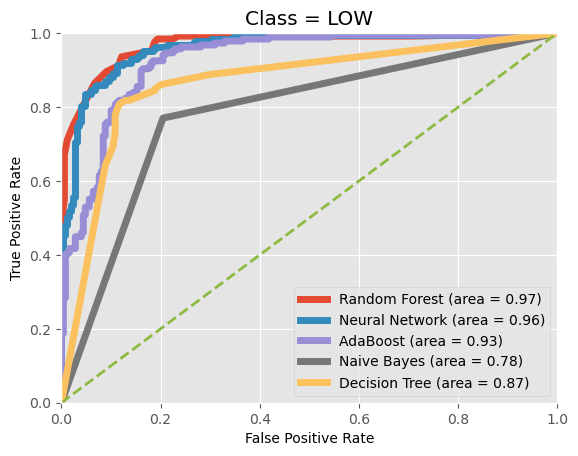

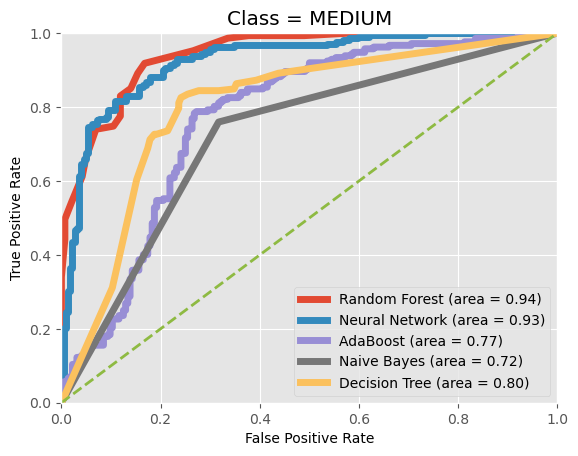

In [93]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    for model in models:
            one_hot_encoding = np.array(pd.get_dummies(model[3], columns = ['PriceLabel']))
        
            fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model[2][:, i])

            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=5, label=model[0] + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

[0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

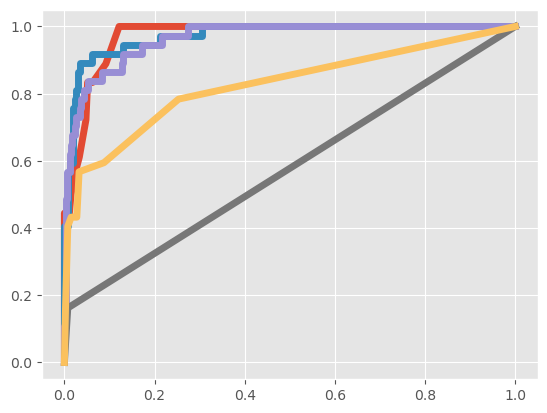

In [94]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    for model in models:
        one_hot_encoding = np.array(pd.get_dummies(model[3], columns = ['PriceLabel']))
        
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model[2][:, i])
        
        print(one_hot_encoding[:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=model[0] + f' (area = {roc_auc[i]:.2f})')
    break


#### Business goal
###### Find the attributes correlated to the price of the houses

We will restrict our analysis to the continuous attributes, although it would be possible to extend the analysis to the non-continuous ones; the company wants to know te attributes non-continous?

In [95]:
numerical = [col for col in housePrice.columns if housePrice[col].dtypes != 'O']

print(len(numerical))

numerical

28


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'YrSold',
 'PriceLabel',
 'OverallQualCond']

Not all the numerical features are real, because the features that refers to years aren't numerical, so we'll remove it

In [96]:
real_numerical = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                  'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PriceLabel']

# remove the irrelevant or redundant features
irrelevant_features = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtFinSF2', 'Heating', 'Electrical',
                       'LowQualFinSF', 'KitchenAbvGr', 'Functional', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                       'PoolQC', 'MiscFeature', 'MiscVal']

real_numerical = [feature for feature in real_numerical if (feature not in irrelevant_features )]

print(len(real_numerical))

for i in real_numerical:
    count = 0
    for j in housePrice.columns:
        if(i == j):
            count += 1
    if(count != 1):
        print("Non trovato numerical :" + str(i) + " "+ str(count))

23


We'll consider the data of the numerical features that we selected above

In [97]:
housePriceNumerical = housePrice[real_numerical]

print(len(housePriceNumerical.columns))

housePriceNumerical.dtypes

23


LotFrontage       float64
LotArea             int64
MasVnrArea        float64
BsmtFinSF1          int64
BsmtUnfSF           int64
TotalBsmtSF         int64
1stFlrSF            int64
2ndFlrSF            int64
GrLivArea           int64
BsmtFullBath        int64
BsmtHalfBath        int64
FullBath            int64
HalfBath            int64
BedroomAbvGr        int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageCars          int64
GarageArea          int64
WoodDeckSF          int64
OpenPorchSF         int64
OpenPorchSF         int64
EnclosedPorch       int64
PriceLabel       category
dtype: object

Le'ts check if there are some categorical attributes in our numerical data

In [98]:
categorical = [col for col in housePriceNumerical.columns if housePriceNumerical[col].dtypes.name == 'category' and col != "PriceLabel"]

print(len(categorical))

categorical

0


[]

In [99]:
X = housePriceNumerical.drop('PriceLabel', axis=1)
y = housePriceNumerical['PriceLabel']

Split data into separate training and test set

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Check the shape of X_train and X_test

In [101]:
X_train.shape, X_test.shape

((1016, 22), (436, 22))

Encoding categorical attributes

In [102]:
import category_encoders as ce

In [103]:
encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Check the shape of X_train and X_test

In [104]:
X_train.shape, X_test.shape

((1016, 22), (436, 22))

In [105]:
cols = X_train.columns

Feature Scaling

We should map all the feature variables into the same scale. It is called feature scaling

In [106]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [107]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [108]:
X_test = pd.DataFrame(X_test, columns=[cols])

Create the model

In [109]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

View the feature scores

In [110]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

GrLivArea        0.132172
GarageCars       0.100215
GarageArea       0.081211
TotalBsmtSF      0.078904
1stFlrSF         0.072477
FullBath         0.067820
BsmtFinSF1       0.050188
LotArea          0.043285
Fireplaces       0.041974
TotRmsAbvGrd     0.041797
2ndFlrSF         0.039622
OpenPorchSF      0.036710
BsmtUnfSF        0.036570
OpenPorchSF      0.034975
LotFrontage      0.032292
WoodDeckSF       0.025599
HalfBath         0.025332
MasVnrArea       0.023141
BedroomAbvGr     0.014458
BsmtFullBath     0.008966
EnclosedPorch    0.008960
BsmtHalfBath     0.003330
dtype: float64

###### + Categorical

Let consider the categorical attributes to encoding

In [111]:
categorical = [col for col in housePrice.columns if housePrice[col].dtypes == 'O']

print(len(categorical))

categorical

35


['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

Take the real categorical attributes, because some numerical features are fake numerical

In [112]:
real_categorical = [col for col in housePrice.columns if col not in real_numerical]

print(len(real_categorical))

real_categorical

41


['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'OverallQualCond']

Split data into separate training and test set

In [113]:
X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Check the shape of X_train and X_test

In [115]:
X_train.shape, X_test.shape

((1016, 62), (436, 62))

Encode categorical variables

In [116]:
encoder = ce.OneHotEncoder(cols=real_categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Check the shape of X_train and X_test

In [117]:
X_train.shape, X_test.shape

((1016, 552), (436, 552))

Feature Scaling

We should map all the feature variables into the same scale. It is called feature scaling

In [118]:
cols = X_train.columns

In [119]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [120]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [121]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [122]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

View the feature scores

In [123]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

GrLivArea          0.057673
GarageCars         0.039895
TotalBsmtSF        0.037490
GarageArea         0.031737
FullBath           0.031546
                     ...   
BsmtCond_5         0.000000
GarageYrBlt_90     0.000000
YearBuilt_108      0.000000
GarageYrBlt_89     0.000000
YearRemodAdd_57    0.000000
Length: 552, dtype: float64